# Aula 4 - pandas

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Manipulação de DataFrames (concat, merge, apply, groupby)
- 2) Métodos úteis (drop, rename, sort_values, sort_index, reset_index, max, min, mean, median, sum, cumsum, quantile, describe, value_counts, unique, nunique)
- 3) Limpeza de Dados (dropna, fillna, isnull, notnull, replace, duplicated, drop_duplicated)

_______

### Objetivos

Apresentar o pandas, frisando sua importância para o processamento de dados e em data science. Apresentar seus principais conceitos (Series, DataFrame) e funcionalidades (leitura de arquivo, filtros, seleção, apply, escrita de arquivos, etc.)

### Habilidades a serem desenvolvidas nessa aula

Ao final da aula o aluno deve:

- Saber como concatenar dataframes,
- Conseguir agrupar os dados e aplicar vários métodos à eles
- Aprender a limpar uma base de dados.

____
____
____

## Titanic

O arquivo que usaremos hoje é relativo ao Titanic! Essa é uma das bases mais famosas de ciência de dados. Você pode saber mais sobre estes dados [clicando aqui!](https://www.kaggle.com/c/titanic)

In [1]:
import pandas as pd

In [2]:
# lê dataframe do arquivo titanic.csv 
df = pd.read_csv("data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


Agora que temos uma base mais complexa, vamos aproveitar para ver agora algumas outras funcionalidades do Pandas!

### Métodos
O pandas possui alguns métodos para entendermos melhor a estrutura dos dados:

#### .describe()

In [7]:
# .describe(include='all') descreve estatísticas básicas sobre as colunas
# repare que nesse caso o próprio pandas fez o trabalho de reconhecer quais colunas são as numéricas
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lefebre, Miss. Jeannie",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### .info()
.info() fornece a quantidade de valores não nulos e o tipo de cada coluna

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### .value_counts()
`.value_counts()` traz a contagem de elementos pra cada valor distinto da coluna em que está sendo aplicado.

In [19]:
df['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
F2             3
              ..
D48            1
B41            1
B71            1
B78            1
B37            1
Name: Cabin, Length: 147, dtype: int64

#### .unique()
retorna quem são os valores únicos da sua coluna. Equivalente ao DISTINCT column no SQL

In [22]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

#### nunique()
retorna a quantidade de valores únicos da sua coluna. Equivalente ao COUNT (DISTINCT column) no SQL

In [23]:
df.Embarked.nunique()

3

#### .rename()
Você consegue renomear tanto o nome das colunas quanto o índice (axis='index').

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# vamos criar uma cópia do df
df_copy = df.copy()
df_copy.rename({'Age':'Idade', 'Name':'Nome'}, axis=1, inplace=True)
df_copy.head()

,PassengerId,Survived,Pclass,Nome,Sex,Idade,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### .drop()
Permite deletar linhas ou colunas inteiras dependendo do parâmetro `axis`. É um dos métodos que aceita o parâmetro `inplace`.

In [29]:
df_copy.drop(['Nome','Idade'], axis=1)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,1,0,113803,53.1000,C123,S
4,5,0,3,male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,211536,13.0000,NaN,S
887,888,1,1,female,0,0,112053,30.0000,B42,S
888,889,0,3,female,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,0,0,111369,30.0000,C148,C


In [32]:
df_copy.drop([0,1,6,7])

,PassengerId,Survived,Pclass,Nome,Sex,Idade,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### .sort_values()
Como diz o nome, o método é utilizado para ordenar os dados baseado em uma ou mais colunas. Para retornar a ordem reversa utilize o argumento `ascending=True`. É um dos métodos que aceita o parâmetro `inplace`.

In [41]:
df.sort_values(['Pclass','Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.00,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.00,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.00,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.00,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.00,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [40]:
df.sort_values(['Pclass','Fare','Age'], ascending=[True, False, True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S


## Limpeza de dados

#### .isna() e isnull()
retorna um df booleano indicando se existe um nulo naquela posição. `pd.isnull()` é um alias para `pd.isna()` dentro do python como podemos ver na <a href="https://github.com/pandas-dev/pandas/blob/0409521665bd436a10aea7e06336066bf07ff057/pandas/core/dtypes/missing.py#L109">documentação</a>. O pandas dataframe é baseado nos df do R, onde null e na tem sentidos distintos.

In [42]:
pd.isnull

<function pandas.core.dtypes.missing.isna(obj)>

In [43]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Para termos a quantidade de nans em cada coluna podemos somar os valores true:

In [44]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### .notnull()
retorna df com True ou False, com True para elementos não nulos

In [47]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [48]:
df.notnull().sum().sum()

9826

#### .dropna()
elimina nulos em todo o df ou em colunas especificadas. É um dos métodos que aceita o parâmetro `inplace`.

In [55]:
df.dropna(subset=['Age', 'Embarked']).isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [50]:
df.dropna().isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [56]:
df.dropna(subset=['Age','Embarked']).isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

É possível utilizar o pandas para fazer **agrupar dados**:

#### .fillna()
preeche os valores nulos com valores especificados. <br>
Parâmetros úteis:
* __method__ {‘bfill’,‘ffill’, None}, default None <br>
    Preenche os nas propagando o último valor válido para frente (ffill) ou utiliza próxima observação válida para preencher os nulos (bfill).
* __axis__ {0 para ‘index’, 1 para ‘colunas’} <br>
    Eixo no qual se quer preencher os nulos
* __inplace__ {booleano}, default False



In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
mn = df.Age.mean()

In [68]:
df.Age.fillna(df.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Quais soluções poderíamos utilizar para preencher os nulos em Age? <br>
E as cabines nulas? <br>
E os portões de embarque nulos? <br>
Qual os possíveis problemas que podemos encontrar utilizando essas abordagens?

In [75]:
df[(df['Pclass']==3) & (df['Fare']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [80]:
pd.set_option('display.max_rows', 1000)

In [82]:
df.sort_values('Name', ascending=False, ).head(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,27.7208,NaN,C
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.00,0,0,345778,9.5000,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.00,0,0,345774,9.5000,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.00,1,0,345572,17.4000,NaN,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.00,0,0,248747,13.0000,NaN,S


#### .replace()
substitui elementos dentro do df.  É um dos métodos que aceita o parâmetro `inplace`.


In [84]:
# para apenas uma troca
df.replace('male', 'H').replace('female', 'M')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",H,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",M,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",M,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",M,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",H,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",H,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",H,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",H,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",M,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",M,14.00,1,0,237736,30.0708,NaN,C


In [86]:
# para mais de uma troca
df['Sex'].replace(['male', 'female'], ['H', 'M'])

0      H
1      M
2      M
3      M
4      H
5      H
6      H
7      H
8      M
9      M
10     M
11     M
12     H
13     H
14     M
15     M
16     H
17     H
18     M
19     M
20     H
21     H
22     M
23     H
24     M
25     M
26     H
27     H
28     M
29     H
30     H
31     M
32     M
33     H
34     H
35     H
36     H
37     H
38     M
39     M
40     M
41     M
42     H
43     M
44     M
45     H
46     H
47     M
48     H
49     M
50     H
51     H
52     M
53     M
54     H
55     H
56     M
57     H
58     M
59     H
60     H
61     M
62     H
63     H
64     H
65     H
66     M
67     H
68     M
69     H
70     H
71     M
72     H
73     H
74     H
75     H
76     H
77     H
78     H
79     M
80     H
81     H
82     M
83     H
84     M
85     M
86     H
87     H
88     M
89     H
90     H
91     H
92     H
93     H
94     H
95     H
96     H
97     H
98     M
99     H
100    M
101    H
102    H
103    H
104    H
105    H
106    M
107    H
108    H
109    M
110    H
1

#### .duplicated()  e .drop_duplicated()
O `.duplicated()` retorna uma series indicando se determinada linha possui duplicados ou não. Já o `.drop_duplicated()`, elimina as linhas duplicadas. <br>
Parametros do `.drop_duplicated()`: <br>

    * subset
        seleciona colunas para serem utilizdas na comparação de linhas duplicadas
    * keep{‘first’, ‘last’, False}, default ‘first’
        Determina qual duplicado manter
    * inplace - bool, default False
        Se False retorna uma cópia do df com as alterações, es True faz as modificações no próprio df


In [88]:
df.duplicated().sum()

0

In [89]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [90]:
# vamos criar um df que possua linhas duplicadas
df_dup = df.copy()

df_dup.loc[891, :] = df_dup.loc[0, :]
                                
df_dup.loc[892, :] = df_dup.loc[1, :]
df_dup.loc[893, :] = df_dup.loc[1, :]

print(df.shape, df_dup.shape)

(891, 12) (894, 12)


In [93]:
df_dup.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [91]:
df_dup.duplicated().sum()

3

In [ ]:
df_dup.duplicated()

In [94]:
df_dup.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00,0.0,0.0,373450,8.0500,NaN,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,NaN,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.00,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00,3.0,1.0,349909,21.0750,NaN,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0.0,2.0,347742,11.1333,NaN,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1.0,0.0,237736,30.0708,NaN,C


In [95]:
print(df_dup.shape)
print(df_dup.drop_duplicates().shape)

(894, 12)
(891, 12)


### Groupby
Assim como no SQL, no pandas também temos um método com o qual podemos agregar os dados. O `groupby` primeiro separa nossos dados em grupos definidos dentro do método,  aplicar um tipo de operação usando agregação, transformação, filtragem ou até uma função própria e, por fim, juntar os resultados encontrados.
<br>

<img src="groupby.png"  style="width: 700px" >
Exemplo de aplicação da função de agregação `mean`
<br><br><br>

Utilizar o `groupby` é o mesmo que fazer a sequência:

    Dividir os dados em grupos utilizando um critério
    
    Aplicar uma função em cada um dos grupos separadamente
    
    Combinar o resultado em uma estrutura de dados

#### Funções de agregação
Com essas funções podemos aplicar operações estatísticas nos nossos dados. Exemplos:<br>
`mean`, `std`, `max`, `min`, `count`, `sum`, `var`. <br>
Quando queremos aplicar apenas uma dessas operações podemos chamá-las diretamente após o `groupby`:


In [98]:
df.groupby(["Pclass"]).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [106]:
# FUNÇÃO DE AGREGAÇÃO mean()
df.groupby(["Pclass", "Sex"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

Aqui agregamos os dados por Pclass e Sex e em todas as colunas numéricas foi calculada a média. Se quiséssemos a média de apenas uma coluna poderíamos adicioná-la ao final da nossa sentença:

In [107]:
# Queremos apenas a média de idade considerando a classe e o sexo
df.groupby(["Pclass", "Sex"]).mean()[['Age']]

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

Ou de modo mais eficiente:

In [112]:
df.groupby(["Pclass", "Sex"])[['Age']].mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

Note que `df.groupby('A').colname.mean()` é mais eficiente que `df.groupby('A').mean().colname` pois a agregação só será realizada na coluna de interesse (colname).

Quando queremos aplicar mais de uma operação chamamos o método `.agg()`

In [115]:
df.groupby(["Pclass"]).agg(['mean','max','min'])

PassengerId           Survived                Age              \
              mean  max min      mean max min       mean   max   min   
Pclass                                                                 
1       461.597222  890   2  0.629630   1   0  38.233441  80.0  0.92   
2       445.956522  887  10  0.472826   1   0  29.877630  70.0  0.67   
3       439.154786  891   1  0.242363   1   0  25.140620  74.0  0.42   

           SibSp             Parch               Fare                 
            mean max min      mean max min       mean       max  min  
Pclass                                                                
1       0.416667   3   0  0.356481   4   0  84.154687  512.3292  0.0  
2       0.402174   3   0  0.380435   3   0  20.662183   73.5000  0.0  
3       0.615071   8   0  0.393075   6   0  13.675550   69.5500  0.0

Para operações distintas em colunas distintas passamos um dicionário com o nome da coluna como chave e a operação como valor

In [121]:
import numpy as np
df_temp = df.groupby(['Pclass']).agg({'Embarked':pd.Series.mode,'Fare':'mean', 'Parch':np.mean })
df_temp

,Embarked,Fare,Parch
Pclass,,,
1,S,84.154687,0.356481
2,S,20.662183,0.380435
3,S,13.675550,0.393075


In [123]:
df_temp.columns = ['mode_embarked', 'mean_fare', 'mean_parch']
df_temp

,mode_embarked,mean_fare,mean_parch
Pclass,,,
1,S,84.154687,0.356481
2,S,20.662183,0.380435
3,S,13.675550,0.393075


In [124]:
df_temp.columns

Index(['mode_embarked', 'mean_fare', 'mean_parch'], dtype='object')

In [125]:
df_temp.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

Se quisermos que o df de saída tenha nomes específicos devemos seguir o padrão:

In [120]:
df.groupby(['Pclass']).agg(mode_embarked=('Embarked',pd.Series.mode), mean_fare=('Fare',np.mean))

,mode_embarked,mean_fare
Pclass,,
1,S,84.154687
2,S,20.662183
3,S,13.675550


Reparem que a coluna utilizada no `groupby` virou um index do nosso df. Para convertê-la em coluna novamente temos duas formas: <br>
  1. chamar o parâmetro `as_index=False` dentro do `groupby`
  2. aplicar `.reset_index()` ao final da sentença

In [126]:
# exemplo com as_index = False
df.groupby(['Pclass'], as_index=False).agg(mode_embarked=('Embarked',pd.Series.mode),mean_fare=('Fare',np.mean))

,Pclass,mode_embarked,mean_fare
0,1,S,84.154687
1,2,S,20.662183
2,3,S,13.675550


In [127]:
# exemplo com .reset_index()
df.groupby(['Pclass']).agg(mode_embarked=('Embarked',pd.Series.mode),mean_fare=('Fare',np.mean)).reset_index()

,Pclass,mode_embarked,mean_fare
0,1,S,84.154687
1,2,S,20.662183
2,3,S,13.675550


In [129]:
df.groupby(['Pclass', 'Sex']).agg(mode_embarked=('Embarked',pd.Series.mode),mean_fare=('Fare',np.mean)).reset_index()

,Pclass,Sex,mode_embarked,mean_fare
0,1,female,S,106.125798
1,1,male,S,67.226127
2,2,female,S,21.970121
3,2,male,S,19.741782
4,3,female,S,16.118810
5,3,male,S,12.661633


E se quisessemos criar uma coluna nova que contenham o valor médio do Fare por Pclass?

In [133]:
df.groupby('Pclass')[["Fare"]].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [131]:
df['fare_mean'] = df.groupby('Pclass')[["Fare"]].mean()

In [132]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.662183
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13.675550
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN


Queremos que todos da primeira classe tenham o valor 84.15 nessa nova coluna, todes da segunda classe tenham o valor 20.66 e da terceira classe 13.67. <br>
Podemos tentar:

In [ ]:
df["Fare_Mean"] = df.groupby('Pclass')["Fare"].mean()

In [ ]:
df.head(10)

Xiiii... deu ruim...
<br>
<br>
Como poderíamos resolver utilizando o `groupby().agg()`?

#### Transformação dos dados
Ao aplicarmos o método `.transform()` temos como retorno um objeto com o mesmo index do df de origem contendo a a tranformação realizada para cada uma das linhas. Dessa forma podemos utilizar esse método e apenas criar uma coluna nova no nosso df.
<br>

Ele será muito **útil na criação de novas features** para os modelos.

In [135]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.662183
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13.675550
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [136]:
df.groupby('Pclass')[["Fare"]].transform('mean')

,Fare
0,13.675550
1,84.154687
2,13.675550
3,84.154687
4,13.675550
5,13.675550
6,84.154687
7,13.675550
8,13.675550
9,20.662183


In [137]:
df["Fare_Mean"] = df.groupby('Pclass')["Fare"].transform('mean')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_mean,Fare_Mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,13.675550
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687,84.154687
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.662183,13.675550
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13.675550,84.154687
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,13.675550
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,13.675550
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,84.154687
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,13.675550
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,13.675550
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,20.662183


Podemos aplicar tanto as operações mencionadas na agregação quanto uma função `lambda`:

In [138]:
df['variacao_max_min'] = df.groupby('Pclass')[["Fare"]].transform(lambda x: x.max() - x.min())
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_mean,Fare_Mean,variacao_max_min
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,13.675550,69.5500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687,84.154687,512.3292
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.662183,13.675550,69.5500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13.675550,84.154687,512.3292
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,13.675550,69.5500
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,13.675550,69.5500
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,84.154687,512.3292
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,13.675550,69.5500
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,13.675550,69.5500
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,20.662183,73.5000


Também podemos preencher os valores nulos com a média de cada grupo

In [139]:
# verificando quantidade de nulos por coluna
df.isna().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
fare_mean           888
Fare_Mean             0
variacao_max_min      0
dtype: int64

Para preencher os nulos utilizaremos o método `.fillna()` que veremos mais ainda hoje

In [149]:
df['Age_sem_nulo'] = df.groupby(['Pclass'])[['Age']].transform(lambda x: x.fillna(x.mean()))

In [150]:
df.isna().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
fare_mean           888
Fare_Mean             0
variacao_max_min      0
Age_sem_nulo          0
dtype: int64

In [151]:
# Conferindo o preenchimento de nulos
# idade média por Pclass
df.groupby(['Pclass'])[['Age']].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [152]:
# selecionando a parte do df que tem idade nula
df[df.Age.isna()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_mean,Fare_Mean,variacao_max_min,Age_sem_nulo
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,13.675550,69.5500,25.140620
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,20.662183,73.5000,29.877630
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN,13.675550,69.5500,25.140620
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN,13.675550,69.5500,25.140620
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN,13.675550,69.5500,25.140620
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,NaN,13.675550,69.5500,25.140620
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,NaN,84.154687,512.3292,38.233441
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,NaN,13.675550,69.5500,25.140620
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,NaN,13.675550,69.5500,25.140620
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,NaN,13.675550,69.5500,25.140620


#### Apply
O método `.apply()` recebe uma função como input e aplica ela para todo o df como se fosse um loop. Se você quiser que essa função seja aplicada nas colunas deve considerar axis=0 e nas linhas axis=1)

In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,fare_mean,Fare_Mean,variacao_max_min,Age_sem_nulo
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,3.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,39.497474,32.204208,177.706125,29.292875
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,38.831731,29.528696,189.403904,13.210527
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,13.675550,13.675550,69.550000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,17.168867,13.675550,69.550000,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,20.662183,13.675550,69.550000,26.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,52.408435,20.662183,73.500000,37.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,84.154687,84.154687,512.329200,80.000000


In [154]:
df.groupby(['Pclass']).apply(lambda x: x.describe())

PassengerId    Survived  Pclass         Age       SibSp  \
Pclass                                                                  
1      count   216.000000  216.000000   216.0  186.000000  216.000000   
       mean    461.597222    0.629630     1.0   38.233441    0.416667   
       std     246.737616    0.484026     0.0   14.802856    0.611898   
       min       2.000000    0.000000     1.0    0.920000    0.000000   
       25%     270.750000    0.000000     1.0   27.000000    0.000000   
       50%     472.000000    1.000000     1.0   37.000000    0.000000   
       75%     670.500000    1.000000     1.0   49.000000    1.000000   
       max     890.000000    1.000000     1.0   80.000000    3.000000   
2      count   184.000000  184.000000   184.0  173.000000  184.000000   
       mean    445.956522    0.472826     2.0   29.877630    0.402174   
       std     250.852161    0.500623     0.0   14.001077    0.601633   
       min      10.000000    0.000000     2.0    0.670000    0.000000   
       25%     234.500000    0.000000     2.0   23.000000    0.000000   
       50%     435.500000    0.000000     2.0   29.000000    0.000000   
       75%     668.000000    1.000000     2.0   36.000000    1.000000   
       max     887.000000    1.000000     2.0   70.000000    3.000000   
3      count   491.000000  491.000000   491.0  355.000000  491.000000   
       mean    439.154786    0.242363     3.0   25.140620    0.615071   
       std     264.441453    0.428949     0.0   12.495398    1.374883   
       min       1.000000    0.000000     3.0    0.420000    0.000000   
       25%     200.000000    0.000000     3.0   18.000000    0.000000   
       50%     432.000000    0.000000     3.0   24.000000    0.000000   
       75%     666.500000    0.000000     3.0   32.000000    1.000000   
       max     891.000000    1.000000     3.0   74.000000    8.000000   

                   Parch        Fare  fare_mean     Fare_Mean  \
Pclass                                                          
1      count  216.000000  216.000000   2.000000  2.160000e+02   
       mean     0.356481   84.154687  48.915119  8.415469e+01   
       std      0.693997   78.380373  49.836276  0.000000e+00   
       min      0.000000    0.000000  13.675550  8.415469e+01   
       25%      0.000000   30.923950  31.295334  8.415469e+01   
       50%      0.000000   60.287500  48.915119  8.415469e+01   
       75%      0.000000   93.500000  66.534903  8.415469e+01   
       max      4.000000  512.329200  84.154687  8.415469e+01   
2      count  184.000000  184.000000   0.000000  1.840000e+02   
       mean     0.380435   20.662183        NaN  2.066218e+01   
       std      0.690963   13.417399        NaN  3.562407e-15   
       min      0.000000    0.000000        NaN  2.066218e+01   
       25%      0.000000   13.000000        NaN  2.066218e+01   
       50%      0.000000   14.250000        NaN  2.066218e+01   
       75%      1.000000   26.000000        NaN  2.066218e+01   
       max      3.000000   73.500000        NaN  2.066218e+01   
3      count  491.000000  491.000000   1.000000  4.910000e+02   
       mean     0.393075   13.675550  20.662183  1.367555e+01   
       std      0.888861   11.778142        NaN  1.778169e-15   
       min      0.000000    0.000000  20.662183  1.367555e+01   
       25%      0.000000    7.750000  20.662183  1.367555e+01   
       50%      0.000000    8.050000  20.662183  1.367555e+01   
       75%      0.000000   15.500000  20.662183  1.367555e+01   
       max      6.000000   69.550000  20.662183  1.367555e+01   

              variacao_max_min  Age_sem_nulo  
Pclass                                        
1      count      2.160000e+02    216.000000  
       mean       5.123292e+02     38.233441  
       std        0.000000e+00     13.731315  
       min        5.123292e+02      0.920000  
       25%        5.123292e+02     29.000000  
       50%        5.123292e+02     38.233441  
       75%        5.123292e+02     47.250000  
 

In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_mean,Fare_Mean,variacao_max_min,Age_sem_nulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,13.675550,69.5500,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687,84.154687,512.3292,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.662183,13.675550,69.5500,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13.675550,84.154687,512.3292,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,13.675550,69.5500,35.0


In [166]:
df.apply(lambda x: x['SibSp'] - x['Parch'], axis=1)

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      2
8     -2
9      1
10     0
11     0
12     0
13    -4
14     0
15     0
16     3
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     2
25    -4
26     0
27     1
28     0
29     0
30     0
31     1
32     0
33     0
34     1
35     1
36     0
37     0
38     2
39     1
40     1
41     1
42     0
43    -1
44     0
45     0
46     1
47     0
48     2
49     1
50     3
51     0
52     1
53     1
54    -1
55     0
56     0
57     0
58    -1
59     3
60     0
61     0
62     1
63     1
64     0
65     0
66     0
67     0
68     2
69     2
70     0
71     3
72     0
73     1
74     0
75     0
76     0
77     0
78    -2
79     0
80     0
81     0
82     0
83     0
84     0
85     3
86    -2
87     0
88     1
89     0
90     0
91     0
92     1
93    -1
94     0
95     0
96     0
97    -1
98    -1
99     1
100    0
101    0
102   -1
103    0
104    2
105    0
106    0
107    0
108    0
109    1
110    0
1

In [168]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_mean,Fare_Mean,variacao_max_min,Age_sem_nulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,13.675550,69.5500,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687,84.154687,512.3292,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.662183,13.675550,69.5500,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13.675550,84.154687,512.3292,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,13.675550,69.5500,35.0


In [171]:
df.loc[136]

PassengerId                                  137
Survived                                       1
Pclass                                         1
Name                Newsom, Miss. Helen Monypeny
Sex                                       female
Age                                           19
SibSp                                          0
Parch                                          2
Ticket                                     11752
Fare                                     26.2833
Cabin                                        D47
Embarked                                       S
fare_mean                                    NaN
Fare_Mean                                84.1547
variacao_max_min                         512.329
Age_sem_nulo                                  19
Name: 136, dtype: object

In [169]:
def subtract_two(x):
    return x['SibSp'] - x['Parch']

pd.DataFrame(df.groupby('Pclass').apply(subtract_two))


0
Pclass       
1      1    1
       3    1
       6    0
       11   0
       23   0
       27   1
       30   0
       31   1
       34   1
       35   1
       52   1
       54  -1
       55   0
       61   0
       62   1
       64   0
       83   0
       88   1
       92   1
       96   0
       97  -1
       102 -1
       110  0
       118 -1
       124 -1
       136 -2
       137  1
       139  0
       151  1
       155 -1
       166 -1
       168  0
       170  0
       174  0
       177  0
       185  0
       187  0
       194  0
       195  0
       209  0
       215  1
       218  0
       224  1
       230  1
       245  2
       248  0
       252  0
       256  0
       257  0
       258  0
       262  0
       263  0
       268 -1
       269  0
       270  0
       273 -1
       275  1
       284  0
       290  0
       291  1
       295  0
       297 -1
       298  0
       299 -1
       305 -1
       306  0
       307  1
       309  0
       310  0
       311  0
       318 -2
       319  0
       325  0
       329 -1
       331  0
       332 -1
       334  1
       336  1
       337  0
       339  0
       341  1
       351  0
       356 -1
       366  1
       369  0
       370  1
       373  0
       375  1
       377 -2
       380  0
       383  1
       390 -1
       393  1
       412  1
       430  0
       434  1
       435 -1
       438 -3
       445 -2
       447  0
       449  0
       452  0
       453  1
       456  0
       457  1
       460  0
       462  0
       467  0
       475  0
       484  1
       486  1
       487  0
       492  0
       493  0
       496  1
       498 -1
       504  0
       505  1
       507  0
       512  0
       513  1
       515  0
       520  0
       523 -1
       527  0
       536  0
       537  0
       539 -2
       540 -2
       544  1
       545  0
       550 -2
       555  0
       556  1
       557  0
       558  0
       571  2
       572  0
       577  1
       581  0
       583  0
       585 -2
       587  0
       591  1
       599  1
       602  0
       604  0
       607  0
       609  0
       621  1
       625  0
       627  0
       630  0
       632  0
       633  0
       641  0
       645  1
       647  0
       659 -2
       660  2
       662  0
       669  1
       671  1
       679 -1
       681  0
       689 -1
       690  1
       694  0
       698  0
       700  1
       701  0
       707  0
       708  0
       710  0
       711  0
       712  1
       716  0
       724  1
       730  0
       737  0
       740  0
       741  1
       742  0
       745  0
       748  1
       759  0
       763 -1
       765  1
       766  0
       779 -1
       781  1
       782  0
       789  0
       793  0
       796  0
       802 -1
       806  0
       809  1
       815  0
       820  0
       822  0
       829  0
       835  0
       839  0
       842  0
       849  1
       853 -1
       856  0
       857  0
       862  0
       867  0
       871  0
       872  0
       879 -1
       887  0
       889  0
2      9    1
       15   0
       17   0
       20   0
       21   0
       33   0
       41   1
       43  -1
       53   1
       56   0
       58  -1
       66   0
       70   0
       72   0
       78  -2
       84   0
       98  -1
       99   1
       117  1
       120  2
       122  1
       123  0
       133  1
       134  0
       135  0
       144  0
       145  0
       148 -2
       149  0
       150  0
       161  0
       178  0
       181  0
       183  1
       190  0
       191  0
       193  0
       199  0
       211  0
       213  0
       217  1
       219  0
       221  0
       226  0
       228  0
       232  0
       234  0
       236  1
       237 -2
       238  0
       239  0
       242  0
       247 -2
       249  1
       259 -1
       265  0
       272 -1
       277  0
       288  0
       292  0
       303  0
       308  1
       312  0
       314  0
       316  1
       317  0
       322  0
       323  0
       3

In [172]:
df.groupby(['Pclass']).apply(lambda x: x['SibSp'] + x['Parch'])

Pclass     
1       1       1
        3       1
        6       0
        11      0
        23      0
        27      5
        30      0
        31      1
        34      1
        35      1
        52      1
        54      1
        55      0
        61      0
        62      1
        64      0
        83      0
        88      5
        92      1
        96      0
        97      1
        102     1
        110     0
        118     1
        124     1
        136     2
        137     1
        139     0
        151     1
        155     1
        166     1
        168     0
        170     0
        174     0
        177     0
        185     0
        187     0
        194     0
        195     0
        209     0
        215     1
        218     0
        224     1
        230     1
        245     2
        248     2
        252     0
        256     0
        257     0
        258     0
        262     2
        263     0
        268     1
        269     0
        270     

#### Transform X Apply
Com o `.transform()` podemos manipular **apenas uma coluna ou linha**, dependendo do parâmetro `axis`. Com o `.apply()` podemos manipular **várias colunas ou linhas** ao mesmo tempo.

## Cruzamento e concatenação de bases

Também é possível fazer **cruzamento de bases** com o pandas. 

Pra quem conhece SQL: esses são os joins!

Pra quem conhece Excel: essa é uma forma de fazer o procv!

Vamos supor que temos as notas de duas provas dos alunos separas em sheets diferentes do excel e queremos juntar essa notas em um único df.

In [3]:
# ler os dados de diferentes sheets do mesmo excel "notas.xlsx"
import pandas as pd

df1 = pd.read_excel("notas.xlsx", sheet_name="notas1")
df2 = pd.read_excel("notas.xlsx", sheet_name="notas2")

In [4]:
df1

,RA,aluno,prova1
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,7,obi wan,10


In [5]:
df2

,RA,aluno,prova2
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,6,anakin,10


Repare que temos alunos distintos nos dois df

Diferentes tipos de join

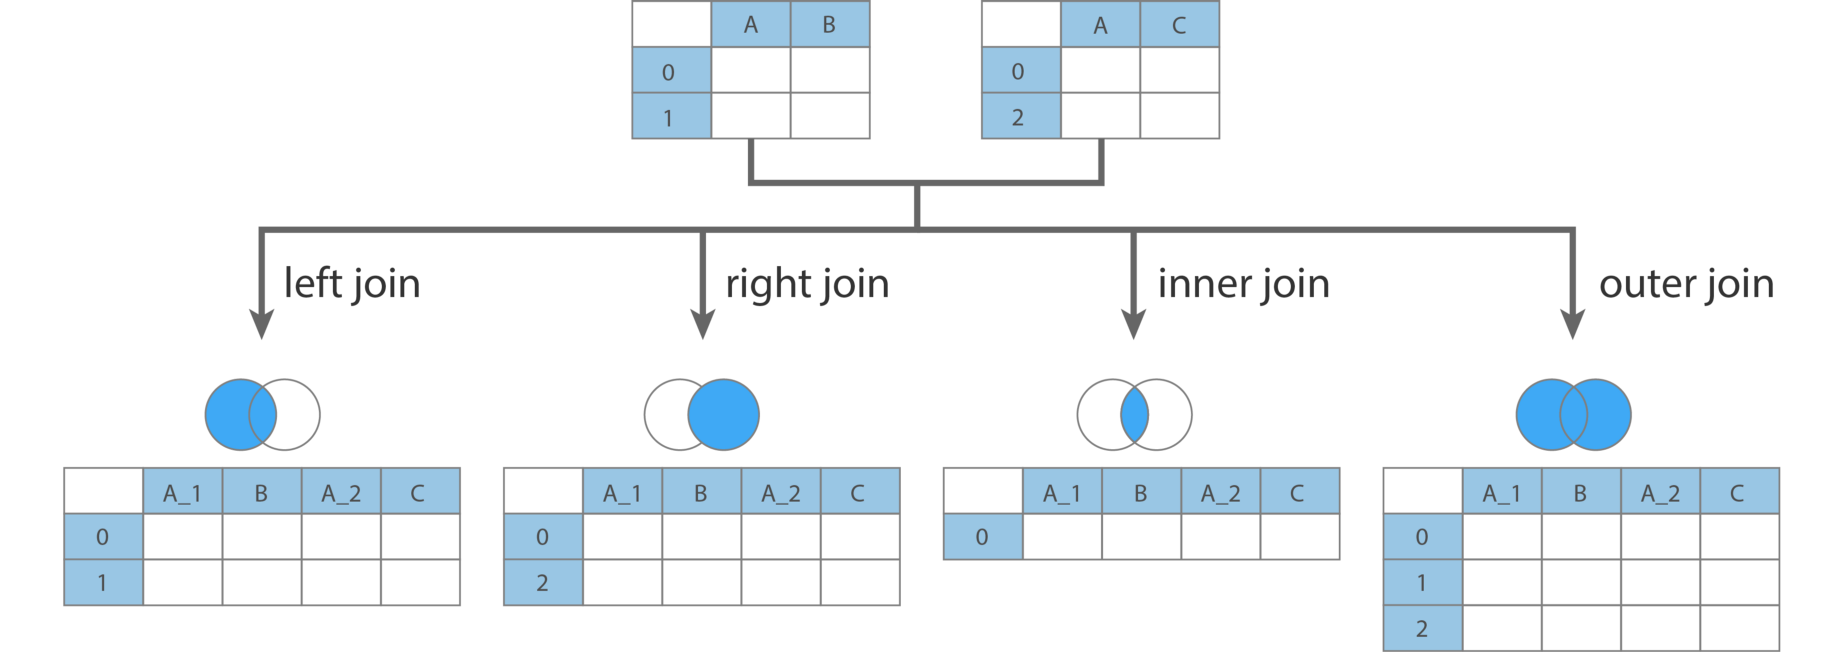
Fonte: https://towardsdatascience.com/python-pandas-dataframe-join-merge-and-concatenate-84985c29ef78

O pandas possui dois métodos específicos para trabalharmos com o join de colunas entre df: `.merge()` e `.join()`. O `.merge()` fornece mais flexibilidade de trabalho e iremos utilizar e ele.

### pd.merge()
pd.merge(
    left,
    right,
    how="inner",
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y")
)

In [6]:
df1

,RA,aluno,prova1
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,7,obi wan,10


In [7]:
df2

,RA,aluno,prova2
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,6,anakin,10


In [8]:
df3 = df1.copy()
df3.loc[5, 'RA'] = 6
df3

,RA,aluno,prova1
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,6,obi wan,10


In [9]:
df_merge = df3.merge(df2, how='outer', suffixes=['_prova1', '_prova2'])
df_merge

,RA,aluno,prova1,prova2
0,1,joão,10.0,10.0
1,4,leia,10.0,10.0
2,2,maria,9.0,9.0
3,3,han,8.0,8.0
4,5,luke,7.0,7.0
5,6,obi wan,10.0,NaN
6,6,anakin,NaN,10.0


In [10]:
df_merge.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [11]:
df_merge[df_merge.RA.duplicated()].RA.iloc[0]

6

In [12]:
df_merge[df_merge.RA.duplicated()].RA.values

array([6])

In [13]:
df_merge[df_merge.RA == df_merge[df_merge.RA.duplicated()].RA.values[0]]

,RA,aluno,prova1,prova2
5,6,obi wan,10.0,NaN
6,6,anakin,NaN,10.0


In [14]:
valores_duplicados_em_RA = df_merge[df_merge.RA.duplicated()].RA.values
print(valores_duplicados_em_RA)
df_merge[df_merge.RA.isin(valores_duplicados_em_RA)]

[6]


,RA,aluno,prova1,prova2
5,6,obi wan,10.0,NaN
6,6,anakin,NaN,10.0


In [15]:
df_merge.duplicated(subset=['RA'])

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [16]:
df_merge[df_merge['aluno_prova1'] != df_merge['aluno_prova2']]

KeyError: 'aluno_prova1'

In [17]:
df_merge[df_merge['aluno_prova1'] != df_merge['aluno_prova2']].drop(5, axis=0)

KeyError: 'aluno_prova1'

In [18]:
df3.merge(df2, how='outer', on=['aluno'], suffixes=['_prova1', '_prova2'])

,RA_prova1,aluno,prova1,RA_prova2,prova2
0,1.0,joão,10.0,1.0,10.0
1,4.0,leia,10.0,4.0,10.0
2,2.0,maria,9.0,2.0,9.0
3,3.0,han,8.0,3.0,8.0
4,5.0,luke,7.0,5.0,7.0
5,6.0,obi wan,10.0,NaN,NaN
6,NaN,anakin,NaN,6.0,10.0


In [19]:
[i for i in list(df3.merge(df2, how='outer', on=['aluno']).columns) if '_x' in i]

['RA_x']

In [20]:
df3.merge(df2, how='outer', on=['aluno'])

,RA_x,aluno,prova1,RA_y,prova2
0,1.0,joão,10.0,1.0,10.0
1,4.0,leia,10.0,4.0,10.0
2,2.0,maria,9.0,2.0,9.0
3,3.0,han,8.0,3.0,8.0
4,5.0,luke,7.0,5.0,7.0
5,6.0,obi wan,10.0,NaN,NaN
6,NaN,anakin,NaN,6.0,10.0


In [21]:
df_junto = df1.merge(df2, how='outer')

df_junto

,RA,aluno,prova1,prova2
0,1,joão,10.0,10.0
1,4,leia,10.0,10.0
2,2,maria,9.0,9.0
3,3,han,8.0,8.0
4,5,luke,7.0,7.0
5,7,obi wan,10.0,NaN
6,6,anakin,NaN,10.0


In [22]:
df1.merge(df2, how="outer", on="RA")

,RA,aluno_x,prova1,aluno_y,prova2
0,1,joão,10.0,joão,10.0
1,4,leia,10.0,leia,10.0
2,2,maria,9.0,maria,9.0
3,3,han,8.0,han,8.0
4,5,luke,7.0,luke,7.0
5,7,obi wan,10.0,NaN,NaN
6,6,NaN,NaN,anakin,10.0


In [23]:
df1.merge(df2, how="outer", on=["RA", "aluno"])

,RA,aluno,prova1,prova2
0,1,joão,10.0,10.0
1,4,leia,10.0,10.0
2,2,maria,9.0,9.0
3,3,han,8.0,8.0
4,5,luke,7.0,7.0
5,7,obi wan,10.0,NaN
6,6,anakin,NaN,10.0


In [24]:
df1

,RA,aluno,prova1
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,7,obi wan,10


In [25]:
df2

,RA,aluno,prova2
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,6,anakin,10


In [48]:
df1[['RA', 'prova1']].merge(df2[['RA', 'prova2']], how="right", on=["RA"])

,RA,prova1,prova2
0,1,10.0,10
1,4,10.0,10
2,2,9.0,9
3,3,8.0,8
4,5,7.0,7
5,6,NaN,10


In [27]:
df4 = df2.copy()

In [28]:
df4.rename({'RA':'RA_p2', "aluno":'aluno_p2'}, inplace=True, axis=1)
df4

,RA_p2,aluno_p2,prova2
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,6,anakin,10


In [29]:
df4.rename({'RA':'RA_p2', "aluno":'aluno_p2', 0:'indice_0'}, axis=0)


,RA_p2,aluno_p2,prova2
indice_0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,6,anakin,10


In [30]:
df1

,RA,aluno,prova1
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,7,obi wan,10


In [31]:
df2

,RA,aluno,prova2
0,1,joão,10
1,4,leia,10
2,2,maria,9
3,3,han,8
4,5,luke,7
5,6,anakin,10


In [32]:
df1.merge(df4, how='inner', left_on=['RA','aluno'], right_on=['RA_p2', 'aluno_p2']).drop(['RA_p2', 'aluno_p2'], axis=1)

,RA,aluno,prova1,prova2
0,1,joão,10,10
1,4,leia,10,10
2,2,maria,9,9
3,3,han,8,8
4,5,luke,7,7


In [33]:
import pandas as pd

In [34]:
pd.__version__

'1.1.5'

In [35]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [39]:
df1.merge(df2, how='cross', on='RA')

KeyError: 'cross'

### pd.concat()
Diferente do `.merge()` e `.join()` que operam apenas com colunas, com o `.concat()` podemos especificar se queremos concatenar em linhas ou colunas.
Na concatenação de colunas o `.concat()` considerando o index dos df e não podemos especificar colunas.

pd.concat(
    objs,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)


In [51]:
pd.concat([df1, df2], axis=1, join="outer")

,RA,aluno,prova1,RA,aluno,prova2
0,1,joão,10,1,joão,10
1,4,leia,10,4,leia,10
2,2,maria,9,2,maria,9
3,3,han,8,3,han,8
4,5,luke,7,5,luke,7
5,7,obi wan,10,6,anakin,10


Repare que ao concatenar diretamente pelo index ele juntou o aluno obi wan com o anakin. Para tirar esse erro podemos utilizar `ignore_index=True` e tirar o `axis=1`.

In [45]:
pd.concat([df1, df2], join="outer", ignore_index=True)

,RA,aluno,prova1,prova2
0,1,joão,10.0,NaN
1,4,leia,10.0,NaN
2,2,maria,9.0,NaN
3,3,han,8.0,NaN
4,5,luke,7.0,NaN
5,7,obi wan,10.0,NaN
6,1,joão,NaN,10.0
7,4,leia,NaN,10.0
8,2,maria,NaN,9.0
9,3,han,NaN,8.0


Ao concatenar dois df nas linhas, o `.concat()` irá considerar o nome das colunas. Se temos colunas com nomes distintos e utilizamos o parâmetro join='inner', ele irá ignorar essas colunas: 

In [46]:
pd.concat([df1, df2], axis=0, join="inner")

,RA,aluno
0,1,joão
1,4,leia
2,2,maria
3,3,han
4,5,luke
5,7,obi wan
0,1,joão
1,4,leia
2,2,maria
3,3,han


## Exercícios

1. Considere a existência de três tabelas distintas:
* customer.csv : Possui a informação dos clientes em duas colunas: customer id  customer name
* products.csv : Contém informação dos produtos vendidos pela empresa em três colunas - p_id (product id), product (name) e price
* sales.csv : Contém informações das vendas realizadas em seis colunas - sale_id, c_id (customer id), p_id (product_id), qty (quantity sold), store (name)

Conhecendo as bases responda:

a) Quais foram os produtos vendidos? 


In [53]:
products=pd.read_csv("data/products.csv") 
sales=pd.read_csv("data/sales.csv") 
customers=pd.read_csv("data/customer.csv") 


In [55]:
sales.head()

,sale_id,c_id,p_id,product,qty,store
0,1,2,3,Monitor,2,ABC
1,2,2,4,CPU,1,DEF
2,3,1,3,Monitor,3,ABC
3,4,4,2,RAM,2,DEF
4,5,2,3,Monitor,3,ABC


In [56]:
sales['product'].unique()

array(['Monitor', 'CPU', 'RAM'], dtype=object)

b) E os não vendidos?

In [ ]:
my_data=pd.merge(sales,products,on='p_id',how='right')

my_data=my_data[my_data['sale_id'].isnull()] 

print(my_data.loc[:,'product_y']) 

c) Quantos clientes não realizaram uma compra? 

In [ ]:
my_data=pd.merge(sales,customers,on='c_id',how='right')
my_data=my_data[my_data['sale_id'].isnull()] 

print(my_data.loc[:,'Customer']) 

d) Liste a quantidade vendida e o faturamento de cada produto 

In [66]:
my_sum=pd.merge(sales,products,how='left',on=['p_id','product'])

my_sum['total_sale']=my_sum['qty']*my_sum['price']

my_sum.groupby(['product'])[['price', 'total_sale']].sum()

,price,total_sale
product,,
CPU,55,55
Monitor,375,900
RAM,270,630


e) Liste a quantidade vendida de cada produto por loja

In [67]:
my_sale=sales.groupby(['product','p_id', 'store'])[['qty']].sum().reset_index()
my_sale

,product,p_id,store,qty
0,CPU,4,DEF,1
1,Monitor,3,ABC,10
2,Monitor,3,DEF,2
3,RAM,2,ABC,3
4,RAM,2,DEF,4


f) Qual loja teve maior faturamento?

In [68]:
my_sum

,sale_id,c_id,p_id,product,qty,store,price,total_sale
0,1,2,3,Monitor,2,ABC,75,150
1,2,2,4,CPU,1,DEF,55,55
2,3,1,3,Monitor,3,ABC,75,225
3,4,4,2,RAM,2,DEF,90,180
4,5,2,3,Monitor,3,ABC,75,225
5,6,3,3,Monitor,2,DEF,75,150
6,7,2,2,RAM,3,ABC,90,270
7,8,3,2,RAM,2,DEF,90,180
8,9,2,3,Monitor,2,ABC,75,150


In [70]:
my_sum.groupby(['store'])[['total_sale']].sum().sort_values('total_sale').tail(1)

,total_sale
store,
ABC,1020


g) Qual produto foi o mais vendido?

In [71]:
my_sum.groupby(['product'])[['qty']].sum().sort_values('qty').tail(1)

,qty
product,
Monitor,12


## Referências
https://pandas.pydata.org/docs/user_guide/groupby.html
https://pandas.pydata.org/docs/user_guide/merging.html
https://towardsdatascience.com/python-pandas-dataframe-join-merge-and-concatenate-84985c29ef78

## Material extra

### Outros parâmetros do groupby por default
* as_index
* sort
* dropna # exclui nans nas keys

<br> Em todas o default do python é True <br>
df.groupby('Pclass', sort=False)["Fare"].mean()

In [ ]:
# dropna
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])
df_dropna

In [ ]:
# Default ``dropna`` is set to True, which will exclude NaNs in keys
df_dropna.groupby(by=["b"], dropna=True).sum()

In [ ]:
df_dropna.groupby(by=["b"], dropna=False).sum()

Repare que podemos chamar qualquer função do `pd.Series` ou  do `numpy`

In [ ]:
df.groupby(["Survived"]).mean()

Uma grande funcionalidade do pandas é o método `apply()`, utilizado para aplicar uma **função** (muitas vezes, uma **função lambda**) a uma coluna ou linha de um DataFrame

Uma função lambda nada mais é que uma **forma alternativa de declarar uma função**, de um jeito mais direto

In [ ]:
# função que retorna o dobro de um número usando def
def dobro(x):
    
    return 2*x

dobro(2)

In [ ]:
# função que retorna o dobro de um número usando lambda x
faz_dobro = lambda x: 2*x

In [ ]:
faz_dobro(6)

Vamos selecionar a coluna de idades...

In [ ]:
df["Age"]

Aplicando uma função lambda **a todos os elementos da coluna**, ou seja, **à todas as linhas da tabela, daquela coluna específica**:

Tomando cada idade + 2, usando a função lambda definida.

Essa função lambda é equivalente a:

```python

def funcao(x)

    return x + 2
```

In [ ]:
df["Age"].apply(lambda x: x + 2)

Um outro exemplo:

In [ ]:
# função: transforma todos os números em string, e concatena "!!!!!!!!!" à string
df["Age"].apply(lambda x: str(x) + "!!!!!!!!!")

Vamos usar uma função lambda para **extrair o sobrenome** dos nomes dos passageiros

Pra extrarir o sobrenome, note que este está separada do resto do nome por vírgula.

Para perceber isso, dê uma olhada na coluna de nomes:

In [ ]:
df["Name"]

Portanto, podemos usar a função para strings `split(",")`, com quebra na vírgula, e depois selecionar o primeiro elemento da lista gerada!

Vamos aproveitar e **criar uma nova coluna da base**, com os sobrenomes!

In [ ]:
df["Surname"] = df["Name"].apply(lambda x: x.split(",")[0])

In [ ]:
df["Surname"]

#### Filtros
O filtro retorna apenas um subset do nosso df. Aqui podemos aplicar filtros mais elaborados do que os vistos na última aula. <br>
Podemos, por exemplo, eliminar categorias do df que possuem apenas alguns elementos:

In [ ]:
df.SibSp.value_counts()

In [ ]:
df.shape

In [ ]:
def filter_func(x):
    return x['Fare'] - x.Fare_Mean < 100

# df_filter = df.groupby(['SibSp']).filter(lambda x: filter_func(x))

df_filter = df.groupby(['SibSp']).filter(lambda x: len(x) >20)
df_filter.shape

In [ ]:
df_filter.SibSp.value_counts()

Vamos supor que antes de afundar o titanic, o time de hapiness quisesse promover uma jogatina para os grupos (segmentado por classe e sexo) que possuem idade média acima de 30 anos.

In [ ]:
df.groupby(['Pclass','Sex'])[['Age']].mean()

como podemos filtrar nosso df para termos apenas os passageiros que pertecem a essas segmentações escolhidas?

In [ ]:
df.groupby(['Pclass','Sex']).filter(lambda x: x['Age'].mean()>30)

### Apply

E se quisessemos comparar o quanto cada passageiro pagou a mais ou a menos da média do Fare?

In [ ]:
def f(group):
    return pd.DataFrame({'Fare_original': group,
                         'Fare_variacao': group - group.mean()})

df[['Fare_original','Fare_variacao']] = df.groupby('Pclass')['Fare'].apply(f)

In [ ]:
df.head()